In [98]:
import skimage
import skimage.io
import skimage.transform
import os
import numpy as np
import utils
import matplotlib.pyplot as plt

In [99]:
def magnitude(fft_im):
    real = fft_im.real
    imag = fft_im.imag
    return np.sqrt(real**2 + imag**2)

def filter_im(im: np.array, verbose: bool):
    fft_im = np.fft.fft2(im)
    
    vert_stripes_im = np.ones_like(im)
    print(vert_stripes_im.shape[1])
    for i in range(0, vert_stripes_im.shape[0], 8):
        vert_stripes_im[:, i:i+4] = 0

    fft_vert_stripes_im = np.fft.fft2(vert_stripes_im)

    fft_show = lambda fft_image: plt.imshow(np.log(magnitude(np.fft.fftshift(fft_image).real) + 1), cmap='gray')
    if verbose: 
        plt.figure(figsize=(20, 4))
    
        plt.subplot(1, 5, 1)
        plt.imshow(im, cmap='gray')

        plt.subplot(1, 5, 2)
        fft_show(fft_im)

        plt.subplot(1, 5, 3)
        fft_show(fft_vert_stripes_im)

        plt.subplot(1, 5, 4)
        plt.imshow(vert_stripes_im, cmap='gray')
        #fft_show(np.fft.ifft(fft_im - fft_vert_stripes_im))

464


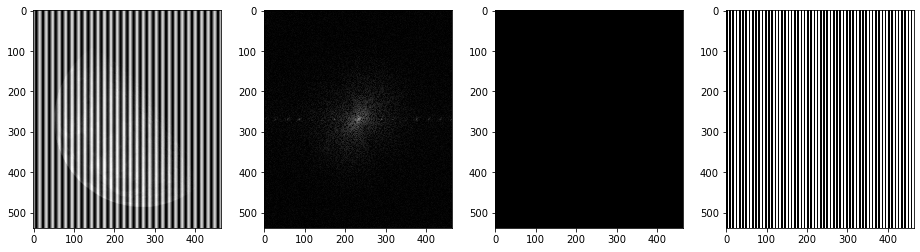

In [100]:
if __name__ == "__main__":
    # DO NOT CHANGE
    impath = os.path.join("images", "noisy_moon.png")
    im = utils.read_im(impath)

    ### START YOUR CODE HERE ### (You can change anything inside this block)

    verbose = True
    im_filtered = filter_im(im, verbose)

    if verbose: 
        plt.show()
    
    

    ### END YOUR CODE HERE ###
    #utils.save_im("moon_filtered.png", utils.normalize(im_filtered))